###Lukas Mosser

In [1]:
import numpy as np
from math import factorial
import pandas as pd
from scipy.special import kn
import matplotlib.pyplot as plt
%matplotlib inline

##Computation of Stehfest Coefficients

In [2]:
stehfest_coeffs = np.zeros((19, len(range(2, 20, 2))))
for N_col, N in enumerate(range(2, 20, 2)):
    for i_col, i in enumerate(range(1, N+1)):
        V_i = 0.
        for k in range(int(np.floor((i+1)/2.)), int(min(i, N/2.))+1):
            V_i += (np.power(k, N/2.)*factorial(2*k))/(factorial(N/2.-k)
                    *factorial(k)*factorial(k-1)*factorial(i-k)*factorial(2*k-i))
        V_i *= np.power(-1, N/2.+i)
        stehfest_coeffs[i_col][N_col] = V_i

data = pd.DataFrame(stehfest_coeffs)

See results assignement 1

##Inversion of Agarwal et. al. type curve:

$$\widetilde{P_{D}}(C_{D}, S, s)=\frac{K_{0}(\sqrt{s})+S\sqrt{s}K_{1}(\sqrt{s})}{s(\sqrt{s}K_{1}(\sqrt{s})+sC_{D}[K_{0}(\sqrt{s})+S\sqrt{s}K_{1}(\sqrt{s})])}$$

Using the given Gaver-Stehfest algorithm the required expanded to:
$$P_{D}(C_{D}, t_{D}) = \frac{ln(2)}{t_{D}}\sum\limits_{i=1}^N V_{i}\frac{K_{0}(\sqrt{i \frac{ln(2)}{t_{D}}})+S\sqrt{i \frac{ln(2)}{t_{D}}}K_{1}(\sqrt{i \frac{ln(2)}{t_{D}}})}{i \frac{ln(2)}{t_{D}}(\sqrt{i \frac{ln(2)}{t_{D}}}K_{1}(\sqrt{i \frac{ln(2)}{t_{D}}})+i \frac{ln(2)}{t_{D}}C_{D}[K_{0}(\sqrt{i \frac{ln(2)}{t_{D}}})+S\sqrt{i \frac{ln(2)}{t_{D}}}K_{1}(\sqrt{i \frac{ln(2)}{t_{D}}})])} $$

In [3]:
def agarwal_type_curve(i, CD, tD, skin):
    s = i*np.log(2)/tD
    sqrt_s = np.sqrt(s)
    k0 = kn(0, sqrt_s)
    k1 = kn(1, sqrt_s)
    return (k0+skin*sqrt_s*k1)/(s*(sqrt_s*k1+s*CD*(k0+skin*sqrt_s*k1)))

In [4]:
pD_rD_tD_N_4 = []
val = 0.
tD_CDs = np.array([1e-1, 2e-1, 3e-1, 4e-1, 6e-1, 8e-1,
                       1e0, 2e0, 3e0, 4e0, 6e0, 8e0,
                       1e1, 2e1, 3e1, 4e1, 6e1, 8e1,
                       1e2, 2e2, 3e2, 4e2, 6e2, 8e2,
                       1e3, 2e3, 3e3, 4e3, 6e3, 8e3,
                       1e4])

CD_vals = [6620, 662, 66.2, 0.662, 6.62e-06]
S_vals = [0.2, 1.4, 2.5, 4.8, 10.6]
N = 10
N_index = 4

inversion = np.zeros((len(tD_CDs), len(CD_vals)+1))
inversion[:,0] = tD_CDs
for inv_index, (CD, S) in enumerate(zip(CD_vals, S_vals)):
    pD = []
    tDs = np.multiply(tD_CDs, CD)
    for k, tD in enumerate(tDs):
        val = 0.
        for i in range(N+1):
            val += stehfest_coeffs[i][N_index]*agarwal_type_curve(i+1, CD, tD, S)
        val *= np.log(2)/tD
        inversion[k][inv_index+1] = val

##Plot of Agarwal type curves on log-log plot and semi-log approximation

$$\frac{t_{D}}{C_{D}} \ in \ range \ [1e-1 \ , \ 1e4] \ (6 \ points \ per \ log-cycle)$$
The semi-log approximation is given as:
$$P_{D}=0.5(ln\frac{t_{D}}{C_{D}}+0.80907+lnC_{D}e^{2s})$$

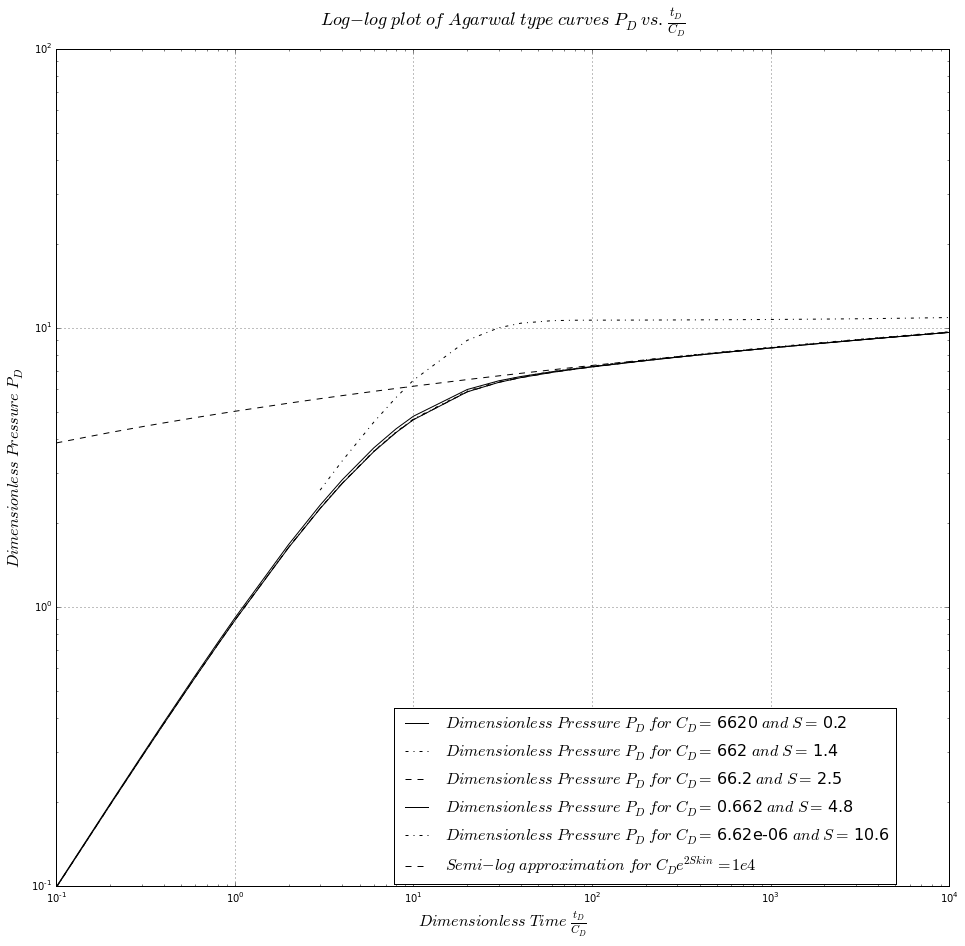

In [5]:
fig, ax = plt.subplots(figsize=(16,15))

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
ax.set_xlim(left=1e-1,right=10000.0)
ax.set_ylim(bottom=1e-1, top=1e2)

ax.set_title(r'$Log-log \ plot \ of \ Agarwal \ type \ curves \ P_{D} \ vs. \ \frac{t_{D}}{C_{D}}$', fontsize=18, y=1.02)

ax.set_xlabel(r'$Dimensionless \ Time \ \frac{t_{D}}{C_{D}}$', fontsize=16)
ax.set_ylabel(r'$Dimensionless \ Pressure \ P_{D}$', fontsize=16)

for i, CD, S, linest in zip(range(1, len(CD_vals)+1), CD_vals, S_vals, ['-', '-.', '--', '-', '-.']):
    ax.plot(inversion[:, 0], inversion[:, i], 
            color="black", label='$Dimensionless \ Pressure \ P_{D} \ for \ C_{D}= \ $'+str(CD)+'$ \ and \ S= \ $'+str(S),
            linestyle=linest)

ax.plot(tD_CDs, 0.5*(np.log(tD_CDs)+0.80907+np.log(1e4)), color="black", label='$Semi-log \ approximation \ for \ C_{D}e^{2Skin}=1e4 \ $', linestyle='--')
    
plt.grid()
legend = plt.legend(bbox_to_anchor=(0., 0.12, 0.95, .102), fontsize=16)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.show()

##Inversion of Gringarten et. al. type curve:

$$\widetilde{P_{D}}(C_{D}, S, s')=\frac{1}{s'[s'+\frac{1}{ln\frac{2}{\gamma \sqrt{\frac{s'}{C_{D}e^{2Skin}}}}}]}$$
$$s'=sC_{D}$$

Using the given Gaver-Stehfest algorithm the required expanded to:
$$P_{D}(C_{D}e^{2Skin}, \frac{t_{D}}{C_{D}}) = \frac{ln(2)C_{D}}{t_{D}}\sum\limits_{i=1}^N V_{i} \frac{1}{i\frac{ln2 C_{D}}{t_{D}}[i\frac{ln2 C_{D}}{t_{D}}+\frac{1}{ln\frac{2}{\gamma \sqrt{\frac{i\frac{ln2 C_{D}}{t_{D}}}{C_{D}e^{2Skin}}}}}]}$$

In [6]:
def gringarten_type_curve(i, tD_CD, CD_e_skin):
    s_dash = i*np.log(2)*1/tD_CD
    return 1/(s_dash*(s_dash+(1/(np.log(2/(1.781*np.sqrt(s_dash/CD_e_skin)))))))

In [7]:
val = 0.
tD_CDs = np.array([1e-1, 2e-1, 3e-1, 4e-1, 6e-1, 8e-1,
                       1e0, 2e0, 3e0, 4e0, 6e0, 8e0,
                       1e1, 2e1, 3e1, 4e1, 6e1, 8e1,
                       1e2, 2e2, 3e2, 4e2, 6e2, 8e2,
                       1e3, 2e3, 3e3, 4e3, 6e3, 8e3,
                       1e4])

CD_e_skins = [1e4]

N = 10
N_index = 4

inversion = np.zeros((len(tD_CDs), len(CD_e_skins)+1))
inversion[:,0] = tD_CDs
for inv_index, CD_e_skin in enumerate(CD_e_skins):
    pD = []
    for k, tD_CD in enumerate(tD_CDs):
        val = 0.
        for i in range(N+1):
            val += stehfest_coeffs[i][N_index]*gringarten_type_curve(i+1, tD_CD, CD_e_skin)
        val *= np.log(2)*1/tD_CD
        inversion[k][inv_index+1] = val

##Plot of Gringarten type curve on log-log plot and semi-log approximation

$$\frac{t_{D}}{C_{D}} \ in \ range \ [1e-1 \ , \ 1e4] \ (6 \ points \ per \ log-cycle)$$
$$C_{D}e^{2Skin}=1e4$$
The semi-log approximations is given as:
$$P_{D}=0.5(ln\frac{t_{D}}{C_{D}}+0.80907+lnC_{D}e^{2s})$$

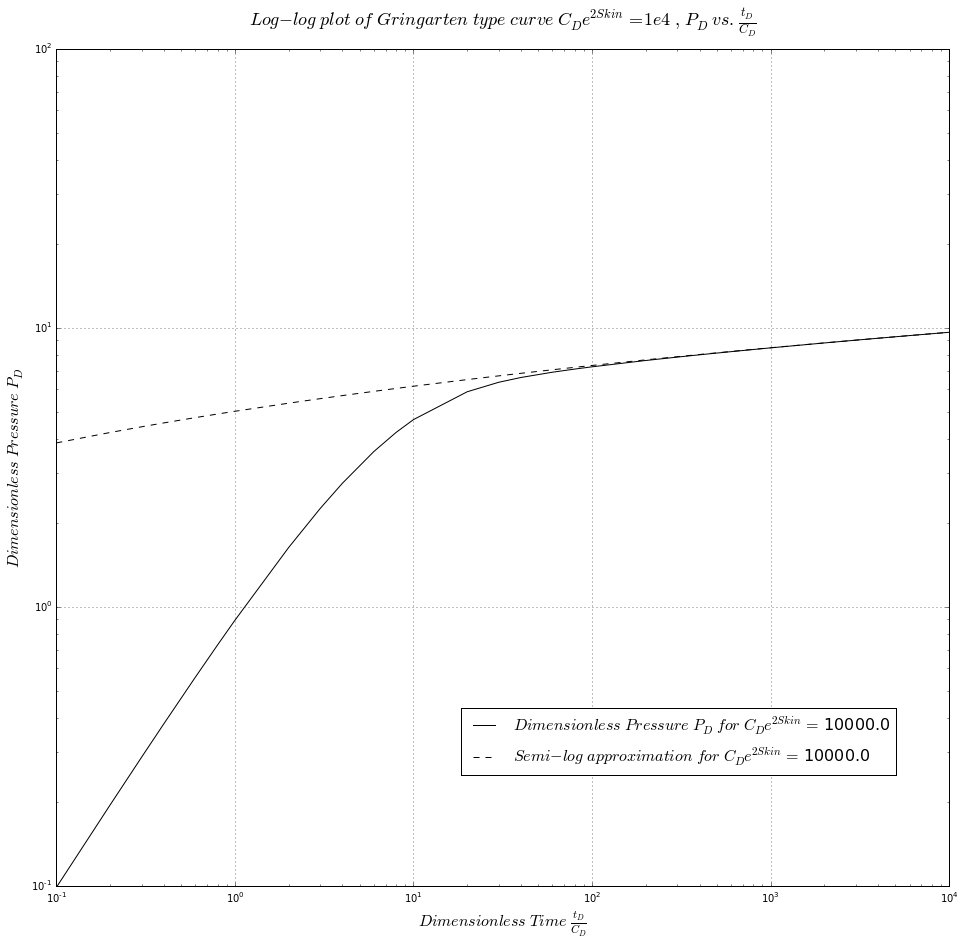

In [8]:
fig, ax = plt.subplots(figsize=(16,15))

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
ax.set_xlim(left=1e-1,right=10000.0)
ax.set_ylim(bottom=1e-1, top=1e2)

ax.set_title(r'$Log-log \ plot \ of \ Gringarten \ type \ curve \ C_{D}e^{2Skin}=1e4 \ , \ P_{D} \ vs. \ \frac{t_{D}}{C_{D}}$', fontsize=18, y=1.02)

ax.set_xlabel(r'$Dimensionless \ Time \ \frac{t_{D}}{C_{D}}$', fontsize=16)
ax.set_ylabel(r'$Dimensionless \ Pressure \ P_{D}$', fontsize=16)

for i, CD_e_skin, linest in zip(range(1, len(CD_e_skins)+1), CD_e_skins, ['-', '-.', '--', '-', '-.']):
    ax.plot(inversion[:, 0], inversion[:, i], 
            color="black", label='$Dimensionless \ Pressure \ P_{D} \ for \ C_{D}e^{2Skin}= \ $'+str(CD_e_skin),
            linestyle=linest)
ax.plot(tD_CDs, 0.5*(np.log(tD_CDs)+0.80907+np.log(1e4)), color="black", label='$Semi-log \ approximation \ for \ C_{D}e^{2Skin}= \ $'+str(CD_e_skin),
            linestyle='--')
    
plt.grid()
legend = plt.legend(bbox_to_anchor=(0., 0.12, 0.95, .102), fontsize=16)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.show()